In [33]:
# Show plots inline, and load main getdist plot module and samples class
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist
# use this *after* importing getdist if you want to use interactive plots
# %matplotlib notebook
import matplotlib.pyplot as plt
import IPython
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
# matplotlib 2 may not work very well without usetex on, can uncomment
# plt.rcParams['text.usetex']=True

GetDist Version: 1.1.2, Matplotlib version: 2.2.2


In [34]:
# Get some random samples for demonstration:
# make random covariance, then independent samples from Gaussian
import numpy as np
ndim = 4
nsamp = 10000
np.random.seed(10)
A = np.random.rand(ndim,ndim)
cov = np.dot(A, A.T)
samps = np.random.multivariate_normal([0]*ndim, cov, size=nsamp)
A = np.random.rand(ndim,ndim)
cov = np.dot(A, A.T)
samps2 = np.random.multivariate_normal([0]*ndim, cov, size=nsamp)

In [35]:
print('A = ',A)
print('cov = ',cov)

A =  [[0.57761623 0.12902268 0.35366737 0.5044406 ]
 [0.91348555 0.20503089 0.97670709 0.12460171]
 [0.63665888 0.56628714 0.98183297 0.19608176]
 [0.61748968 0.34337159 0.45177429 0.68890093]]
cov =  [[0.72982829 0.9623813  0.88696227 0.9082622 ]
 [0.9623813  1.84597584 1.68108039 1.16155906]
 [0.88696227 1.68108039 1.7284597  1.166225  ]
 [0.9082622  1.16155906 1.166225   1.17788205]]


In [36]:
# Get the getdist MCSamples objects for the samples, specifying same parameter
# names and labels; if not specified weights are assumed to all be unity
names = ["x%s"%i for i in range(ndim)]
labels =  ["x_%s"%i for i in range(ndim)]
samples = MCSamples(samples=samps,names = names, labels = labels)
samples2 = MCSamples(samples=samps2,names = names, labels = labels, label='Second set')

Removed no burn in
Removed no burn in


C:\Users\Dea\Documents\anaconda\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x
C:\Users\Dea\Documents\anaconda\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x
C:\Users\Dea\Documents\anaconda\lib\site-packages\scipy\fftpack\basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `a

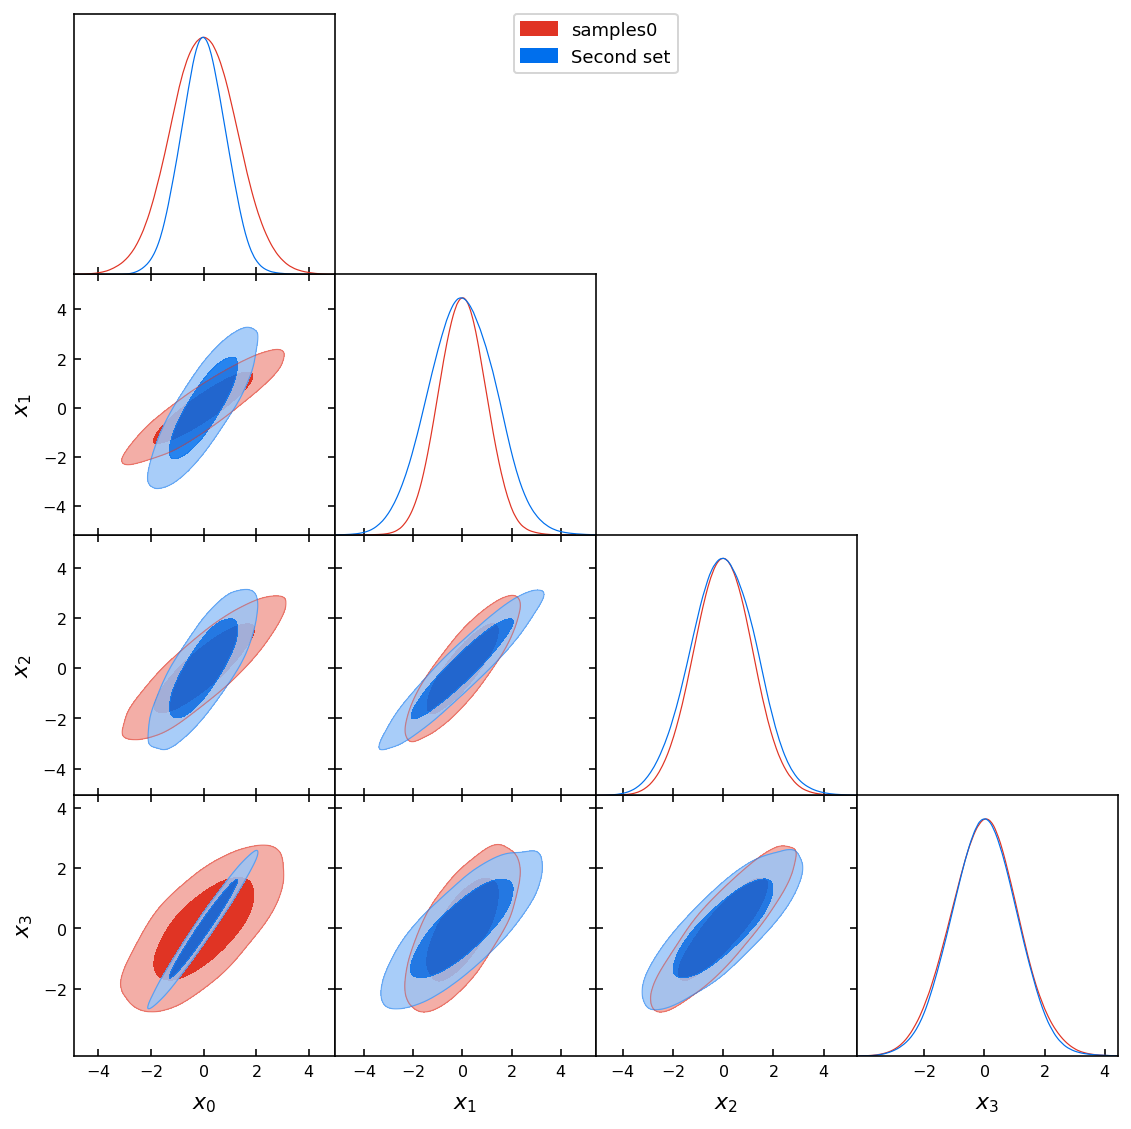

In [37]:
# Triangle plot
g = plots.get_subplot_plotter()
g.triangle_plot([samples, samples2], filled=True);

In [38]:
# Here we are using inline plots, but if you wanted to export to file you'd just do e.g.
# g.export('output_file.pdf')

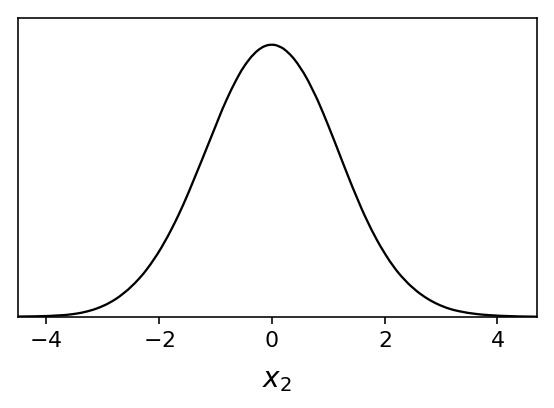

In [39]:
# 1D marginalized plot
g = plots.get_single_plotter(width_inch=4)
g.plot_1d(samples, 'x2')


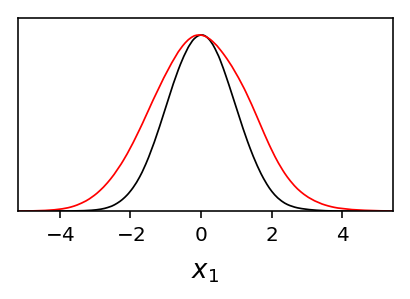

In [40]:
# 1D marginalized comparison plot
g = plots.get_single_plotter(width_inch=3)
g.plot_1d([samples, samples2], 'x1')

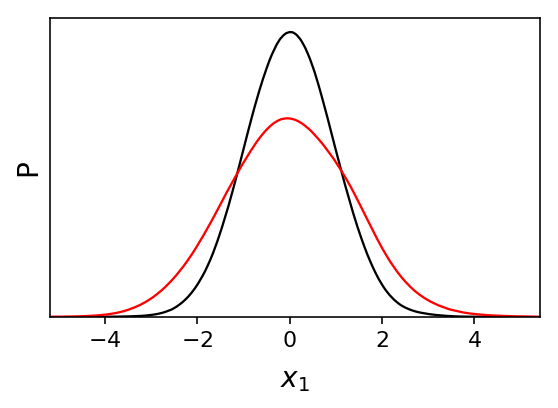

In [41]:
# 1D normalized comparison plot
g = plots.get_single_plotter(width_inch=4)
g.plot_1d([samples, samples2], 'x1', normalized=True)

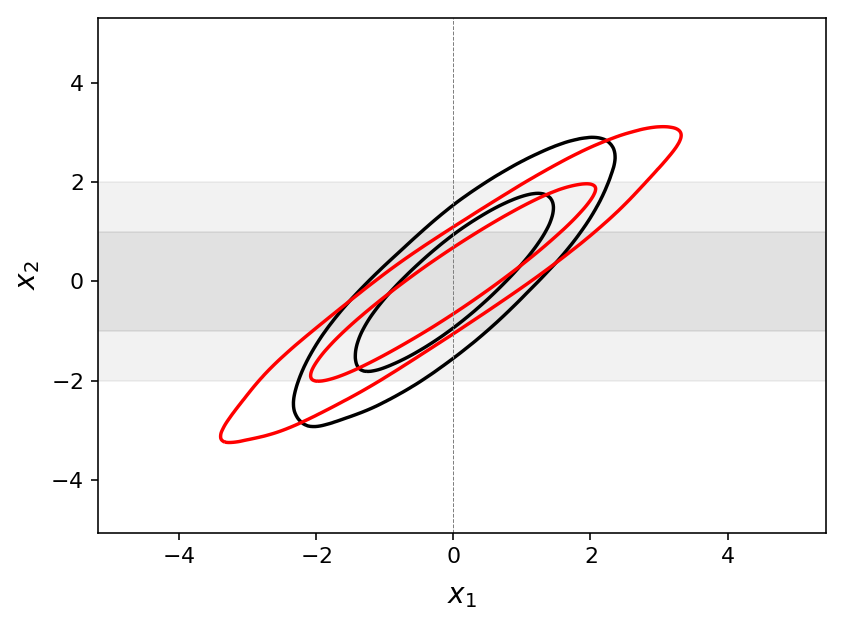

In [42]:
# 2D line contour comparison plot with extra bands and markers
g = plots.get_single_plotter()
g.plot_2d([samples, samples2], 'x1', 'x2')
g.add_x_marker(0)
g.add_y_bands(0, 1)

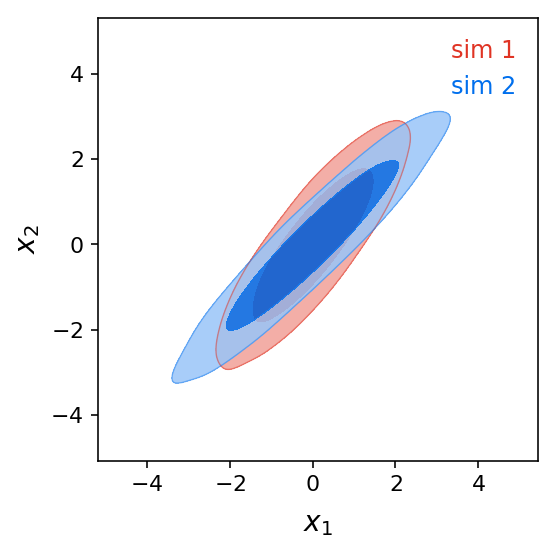

In [43]:
# Filled 2D comparison plot with legend
g = plots.get_single_plotter(width_inch=4, ratio=1)
g.plot_2d([samples, samples2], 'x1', 'x2', filled=True)
g.add_legend(['sim 1', 'sim 2'], colored_text=True);

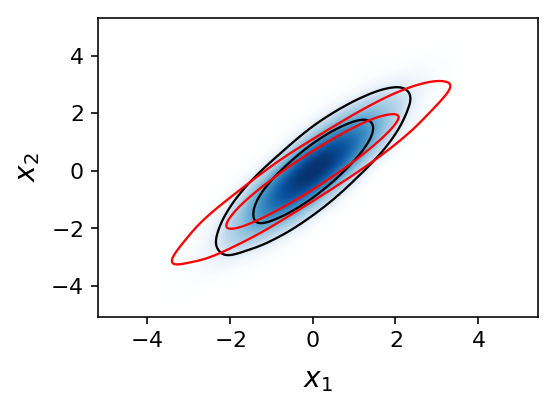

In [44]:
# Shaded 2D comparison plot
g = plots.get_single_plotter(width_inch=4)
g.plot_2d([samples, samples2], 'x1', 'x2', shaded=True);

In [24]:
 #Customized 2D filled comparison plot
g = plots.get_single_plotter(width_inch=6, ratio=3 / 5.)
g.settings.legend_fontsize = 12
g.plot_2d([samples, samples2], 'x1', 'x2', filled=True, 
    colors=['green', ('#F7BAA6', '#E03424')], lims=[-4, 7, -5, 5])
g.add_legend(['Sim ', 'Sim 2'], legend_loc='upper right');

SyntaxError: invalid syntax (<ipython-input-24-2227253ce8af>, line 1)

In [ ]:
# Change the contours levels for marge stats and plots
# (note you need a lot of samples for 99% confidence contours to be accurate)
g = plots.get_single_plotter()
samples.updateSettings({'contours': [0.68, 0.95, 0.99]})
g.settings.num_plot_contours = 3
g.plot_2d(samples, 'x1', 'x2');

In [ ]:
# 2D scatter (3D) plot
g = plots.get_single_plotter(width_inch=5)
g.plot_3d(samples, ['x1', 'x2', 'x3'])

In [ ]:
# Multiple 1D subplots
g = plots.get_subplot_plotter(width_inch=5)
g.plots_1d(samples, ['x0', 'x1', 'x2', 'x3'], nx=2);

In [ ]:
# Multiple 2D subplots
g = plots.get_subplot_plotter(subplot_size=2.5)
g.settings.scaling = False # prevent scaling down font sizes even though small subplots
g.plots_2d(samples, param_pairs=[['x0', 'x1'], ['x2', 'x3']], 
           nx=2, filled=True);

In [ ]:
# Customized triangle plot
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.4
g.settings.title_limit_fontsize = 14
g.triangle_plot([samples, samples2], ['x0', 'x1', 'x2'], 
    filled=True, 
    legend_labels=['Simulation', 'Simulation 2'], 
    legend_loc='upper right', 
    line_args=[{'ls':'--', 'color':'green'},
               {'lw':2, 'color':'darkblue'}], 
    contour_colors=['green','darkblue'],
    title_limit=1, # first title limit (for 1D plots) is 68% by default
    markers={'x2':0})

In [25]:
help(np.random.multivariate_normal)

Help on built-in function multivariate_normal:

multivariate_normal(...) method of numpy.random.mtrand.RandomState instance
    multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)
    
    Draw random samples from a multivariate normal distribution.
    
    The multivariate normal, multinormal or Gaussian distribution is a
    generalization of the one-dimensional normal distribution to higher
    dimensions.  Such a distribution is specified by its mean and
    covariance matrix.  These parameters are analogous to the mean
    (average or "center") and variance (standard deviation, or "width,"
    squared) of the one-dimensional normal distribution.
    
    .. note::
        New code should use the ``multivariate_normal`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    mean : 1-D array_like, of length N
        Mean of the N-dimensional distribution.
    cov : 2-D array_like,